<a href="https://colab.research.google.com/github/kwakyosong/BIO_Python/blob/main/%EB%8C%80%EC%9D%91%ED%91%9C%EB%B3%B8_T_%EA%B2%80%EC%A0%95_%EA%B7%B8%EB%9E%98%ED%94%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

T-statistic: 0.73, P-value: 0.5058


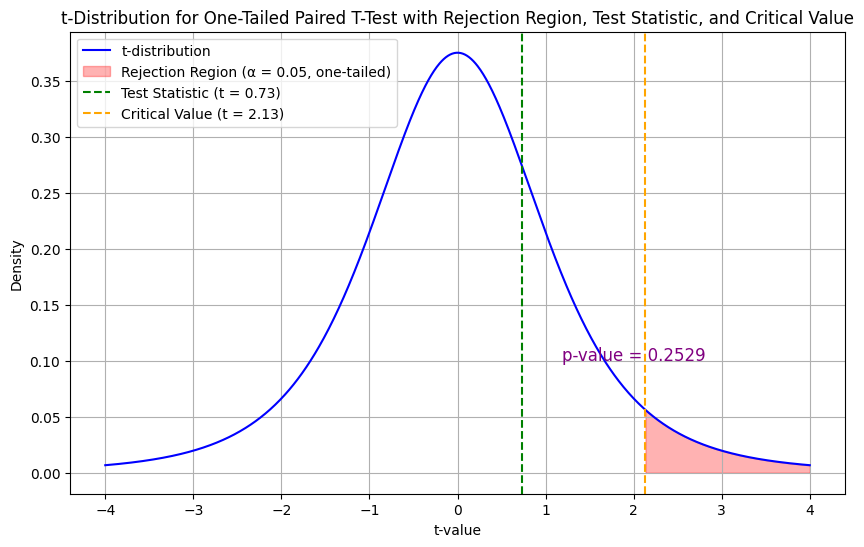

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, ttest_rel

# 약물 투여 전후 데이터
before_treat = [88, 78, 64, 92, 57]
after_treat = [72, 69, 75, 70, 68]

# 단측 T 검정 수행
t_stat, p_value = ttest_rel(before_treat, after_treat)
print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.4f}")

p_value /= 2  # 단측 검정 p-value로 조정

# 자유도 계산
n = len(before_treat)
degrees_of_freedom = n - 1

# 임계값 계산 (단측 검정, alpha = 0.05)
alpha = 0.05
critical_value = t.ppf(1 - alpha, degrees_of_freedom)

# t-분포 데이터 생성
x = np.linspace(-4, 4, 1000)
y = t.pdf(x, degrees_of_freedom)

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(x, y, color="blue", label="t-distribution")

# 기각 영역 (alpha = 0.05, 단측 검정 기준)
plt.fill_between(x, 0, y, where=(x > critical_value), color="red", alpha=0.3, label="Rejection Region (α = 0.05, one-tailed)")

# t 통계량 및 임계값 표시
plt.axvline(t_stat, color="green", linestyle="--", label=f"Test Statistic (t = {t_stat:.2f})")
plt.axvline(critical_value, color="orange", linestyle="--", label=f"Critical Value (t = {critical_value:.2f})")

# p-값 주석 추가
plt.text(2, 0.1, f"p-value = {p_value:.4f}", color="purple", fontsize=12, ha="center")

# 그래프 설정
plt.title("t-Distribution for One-Tailed Paired T-Test with Rejection Region, Test Statistic, and Critical Value")
plt.xlabel("t-value")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()
